# Week of Oct21 HW

#### 1:

$$y = \beta_0 + \beta_1 x + \varepsilon$$ is the equation for a simple linear regression model. 

Components of the linear regression model:
- $y$: predictor variable (output of the model; the dependent variable we are estimating)
- $x$: outcome variable (input of the model; the independent variable we are using to estimate the predictor variable)
- $\beta_1$: slope coefficient (slope of the linear curve)
- $\beta_0$: intercept coefficient (y-intercept of the linear curve)
- $\varepsilon$: error term (vertical difference from predicted and observed values at a single point)

The aim for the Linear Regression model is to predict a dependent variable based on a input variable, using a line that best fits the data we have. 


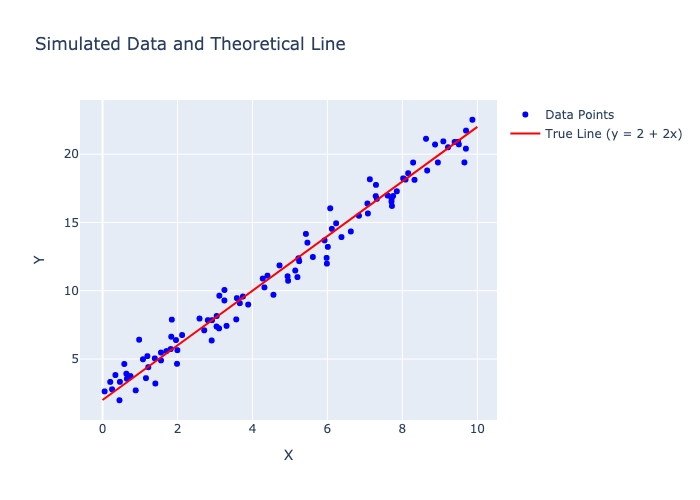

In [99]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import uniform, norm

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Generate 100 x values uniformly between 0 and 10
x = uniform.rvs(loc=0, scale=10, size=100)

# Step 2: Generate corresponding y values with slope 2, intercept 2 and random error from a normal distribution with std 1
slope = 2
intercept = 2
error = norm.rvs(loc=0, scale=1, size=100)
y = intercept + slope * x + error

# Step 3: Create a DataFrame with the predictor 'x' and response 'y'
df = pd.DataFrame({'x': x, 'y': y})

# Step 4: Create the theoretical line y = 2 + 2x
x_line = np.linspace(0, 10, 100)
y_line = intercept + slope * x_line

# Step 5: Plot the data points and the regression line
fig = go.Figure()

# Add the data points
fig.add_trace(go.Scatter(x=df['x'], y=df['y'], mode='markers', name='Data Points', marker=dict(color='blue')))

# Add the theoretical regression line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='True Line (y = 2 + 2x)', line=dict(color='red')))

# Update the layout
fig.update_layout(title='Simulated Data and Theoretical Line',
                  xaxis_title='X',
                  yaxis_title='Y',
                  showlegend=True)

# Show the figure
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS



In [5]:
slope, intercept

(2, 2)

Above are the slope, intercept that were pre-determined. We generated 100 random datapoints with those slope and intercept values, then added a random error term (generated from a normal distribution with std=1). 

#### 2:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4065.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.35e-81
Time:                        01:07:32   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2151      0.170     13.008      0.0

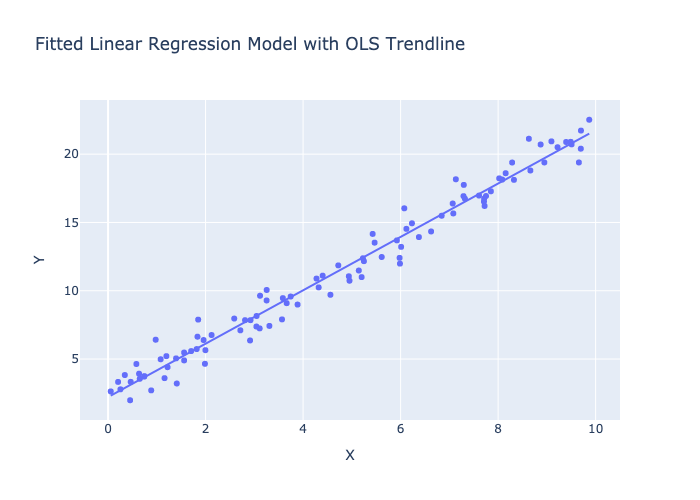

In [100]:
import plotly.express as px
import statsmodels.formula.api as smf

# Step 1: Fit the linear regression model using statsmodels
model = smf.ols(formula='y ~ x', data=df).fit()

# Display the summary of the regression results
print(model.summary())
print(model.params)
print(model.rsquared) 

# Step 3: Use Plotly Express to add the OLS trendline
fig = px.scatter(df, x='x', y='y', title='Fitted Linear Regression Model with OLS Trendline',
                 trendline='ols', labels={'x': 'X', 'y': 'Y'})

# Update traces to label the OLS trendline in the legend
fig.update_traces(selector=dict(mode='lines'), name='OLS Trendline')

# Update layout for better visualization
fig.update_layout(xaxis_title='X',
                  yaxis_title='Y',
                  showlegend=True)

# Show the figure
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS



Process: 
1. Use ``smf.ols().fit()`` to fit a regression line to the values generated in question 1. 
3. ``model.summary()`` outputs the intercept and slope, with the standard error values for both.
   

#### 3: 


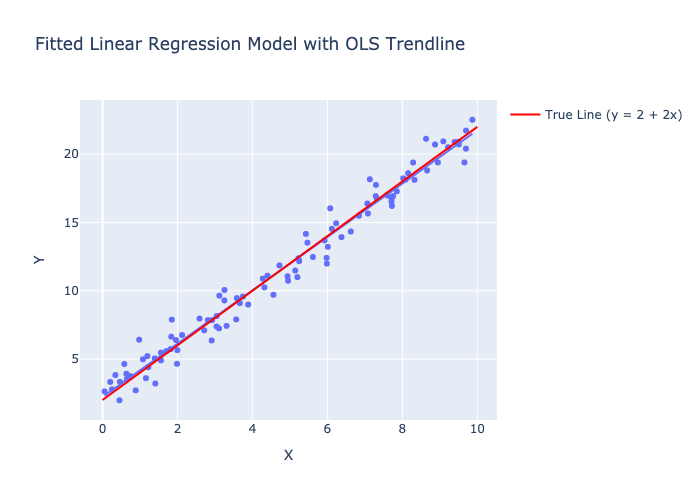

In [101]:

fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='True Line (y = 2 + 2x)', line=dict(color='red')))
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


In question 1, we are displaying the true line (y = 2 + 2x) and adding random error values to that to generate points. 

In question 2, we are generating a line of best fit using OLS, fitting a linear line that **best minimizes the error values between the points and the line**. This is why the equation is slightly different (y = 2.21 + 1.954x), but should better model the data points we have. ``model.fittedvalues`` then outputs all the **y** values according to that line at all **x** values to display the trendline. 

#### 4: 


``model.params`` outputs the coefficients calculated by the **linear regression model**, which are ``intercept=2.215096``, ``slope=1.954023``. This is similar, but not identical to the original true line we set, where ``intercept=2``, ``slope=2``, as the new ones should fit the data better than the original true line (due to random error). 

In ``model.fittedvalues``, we use the coefficients and the best-fit line calculated by the linear regression model to output a set of new y values based on the original x values. 

For example, at $(2, y)$, $y = 2.215(2) + 1.95 = 6.38$. 

In [26]:
model.fittedvalues, y

(0      9.533695
 1     20.792269
 2     16.518424
 3     13.913019
 4      5.263736
         ...    
 95    11.863974
 96    12.429414
 97    10.569345
 98     2.711792
 99     4.323319
 Length: 100, dtype: float64,
 array([ 9.57784945, 20.71527878, 16.73163961, 11.98560077,  4.90070092,
         5.47700298,  4.63956629, 18.8052527 , 13.21380663, 15.65969451,
         3.327092  , 21.72694815, 18.11909261,  6.76004965,  5.73357689,
         6.63673519,  7.38279177, 12.16746649, 10.24679222,  6.36106786,
        14.53317817,  5.05093249,  7.84800643,  9.09264973,  9.70602894,
        17.28287391,  5.65076113, 11.4824115 , 13.68700567,  3.33305911,
        16.03708294,  5.58506029,  3.55858225, 20.90326483, 19.39386945,
        18.14143309,  8.15250559,  6.41668439, 15.49229957, 11.10459722,
         4.40605293, 10.73486016,  3.83059324, 20.93834107,  7.96663158,
        14.34105823,  9.63701583, 10.99950936, 13.52106268,  7.88754474,
        20.40115623, 16.93635874, 20.8896302 , 19.393

In [27]:
model.params

Intercept    2.215096
x            1.954023
dtype: float64

#### 5: 

The error term (or residual) for each datapoint represents the **vertical distance from the datapoint to the trendline**. This can be calculated through 

$$\epsilon = y_i - (\beta_0 + \beta_1 x_i)$$

OLS stands for ordinary least squares. This algorithm aims to minimize the value of the **sum of residuals squared** for all data points, using calculus to find the minimum value given $\beta_0$ and $\beta_1$. 

By squaring the residuals, this ensures that we **penalize larger errors** more than smaller ones (and also makes all negative residuals positive to prevent cancelling out). 

There can also be other types of objective functions that can be used to fit a linear regression model to a dataset. 

#### 6: 

In [45]:
np.corrcoef(y, x)[0,1]**2

0.9764567983510791

In [46]:
np.corrcoef(y, model.fittedvalues)[0,1]**2

0.9764567983510791

In [33]:
model.rsquared

0.9764567983510799

In [50]:
1-((y-model.fittedvalues)**2).sum()/((y-y.mean())**2).sum()

0.9764567983510799

``np.corrcoef()`` calculates the correlation coefficient between two sets of data, basically asking how linearly y increases when x increases, and is the same as $R^2$. 

$$R^2 = 1 - \frac{RSS}{TSS}$$

RSS = sum of squares of residual 

TSS = total sum of squares

This is calculated by the equation in the cell above, where the numerator is the difference between the original y-values and the fitted y-value squared, and the denominator is the difference between the original y-values to the sample average. 

**The larger the difference, the larger the number we are subtracting from 1.** Thus, this can be interpreted as a measure of the accuracy of the model.

#### 7: 

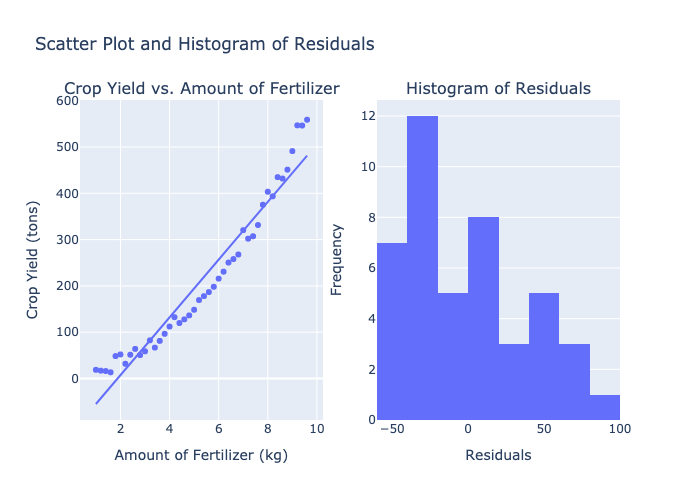

In [97]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Some assumptions that don't work: 
- it seems the relationship between crop yield and amount of fertilizer does not follow a linear relationship but rather a quadratic or cubic relationship

# Week of Nov04 HW 

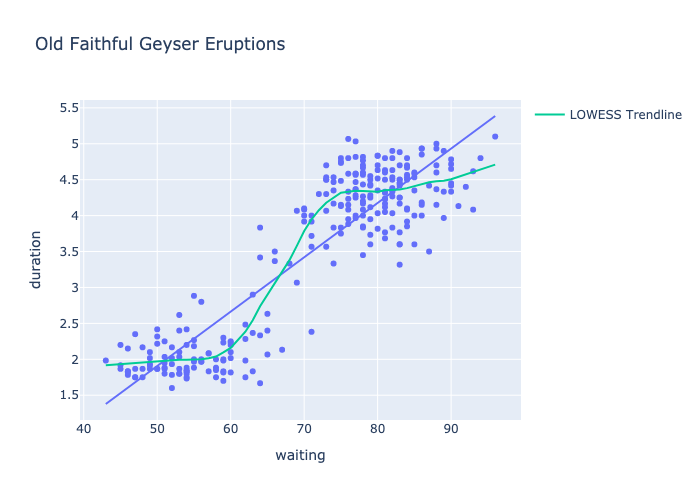

In [96]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


#### 8:

$\mu_0$: $b_1 = 0 $

In [6]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        22:55:32   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: according to the 95% confidence interval for the slope (which is between 0.071 and 0.080) which does not contain 0, I can plausibly reject the null hypothesis.

#### 9: 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


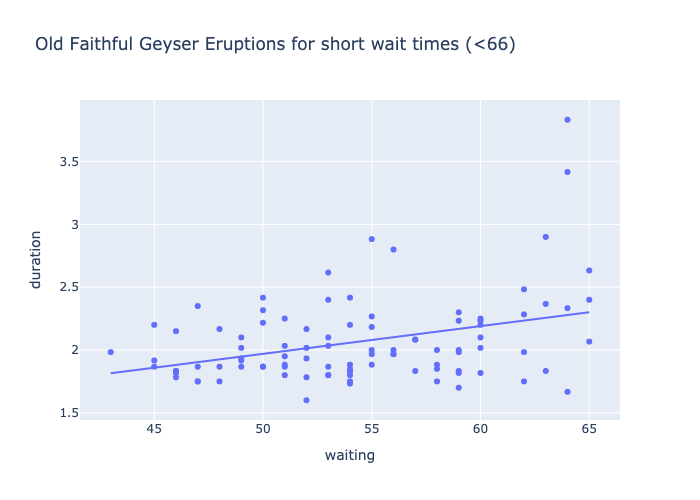

In [95]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 66 #

short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Let's assume alpha significance level = 0.05.

``short_wait_limit = 62``: 95% confidence interval is -0.005, -0.019, p-value is 0.238

``short_wait_limit = 64``: 95% confidence interval is 0.001, 0.022, p-value is 0.036

``short_wait_limit = 66``: 95% confidence interval is 0.010, 0.034, p-value is 0.000

For ``short_wait_limit = 62``, as p-value > 0.05 and 0 is contained within the 95% confidence interval, it's more plausible to accept the null hypothesis. 

Hoewver, for the others, as p-value < 0.05 and 0 is not in the interval, it's more plausible to reject the null hypothesis. 

#### 10: 

95% Confidence Interval for Slope Coefficient: [-0.0001, 0.0225]


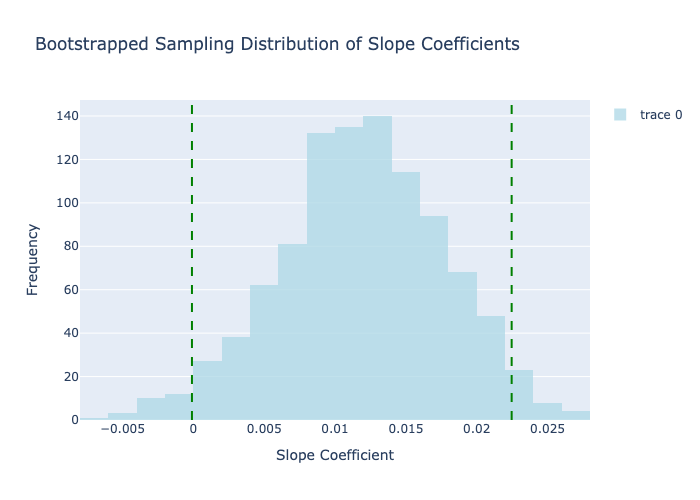

In [94]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go

# Set a limit for what constitutes a "long wait"
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Collect slope coefficients from bootstrapped samples
slope_coefficients = []

# Number of bootstrap iterations
n_iterations = 1000

# Perform bootstrapping
for _ in range(n_iterations):
    # Resample with replacement from the original data
    bootstrap_sample = old_faithful[long_wait].sample(frac=1, replace=True)
    
    # Fit the simple linear regression model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Extract the slope coefficient and store it
    slope_coefficients.append(model.params['waiting'])

# Convert slope coefficients to a NumPy array for easy manipulation
slope_coefficients = np.array(slope_coefficients)

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
lower_bound = np.percentile(slope_coefficients, 2.5)
upper_bound = np.percentile(slope_coefficients, 97.5)

# Print the 95% confidence interval
print(f"95% Confidence Interval for Slope Coefficient: [{lower_bound:.4f}, {upper_bound:.4f}]")

# Plot the sampling distribution of the slope coefficients
fig = go.Figure()

# Add the histogram of bootstrapped slope coefficients
fig.add_trace(go.Histogram(
    x=slope_coefficients,
    nbinsx=20,
    marker_color='lightblue',
    opacity=0.75
))

# Add vertical lines for the 95% confidence interval
fig.add_vline(x=lower_bound, line=dict(color='green', width=2, dash='dash'), name='95% CI Lower Bound')
fig.add_vline(x=upper_bound, line=dict(color='green', width=2, dash='dash'), name='95% CI Upper Bound')

# Customize the layout of the plot
fig.update_layout(
    title="Bootstrapped Sampling Distribution of Slope Coefficients",
    xaxis_title="Slope Coefficient",
    yaxis_title="Frequency",
    showlegend=True
)

# Show the figure
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS



Observed Slope Coefficient: 0.024238676296748866
Calculated p-value: 0.0
95% Confidence Interval for the Slope Coefficient: [-0.0097, 0.0099]


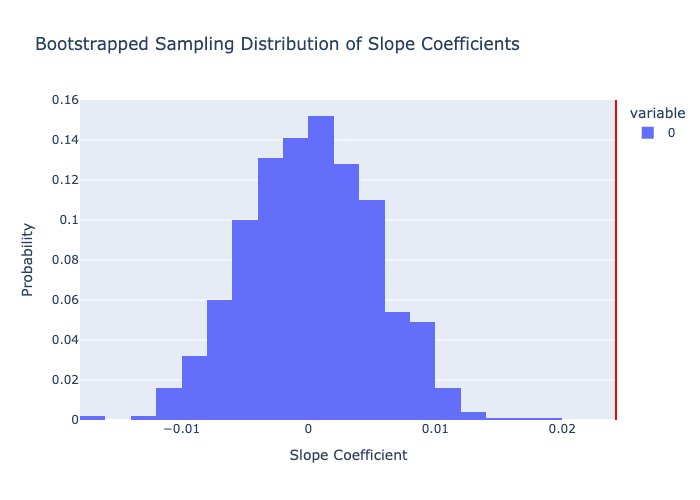

Model Summary from smf.ols (Original Data):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3519      0.439      5.360      0.000       1.486       3.218
waiting        0.0242      0.005      4.445      0.000       0.013       0.035


In [93]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Step 1: Bootstrapping process to generate the sampling distribution of slope coefficients
observed_data = old_faithful[long_wait]
waiting_values = observed_data['waiting'].values
n = len(waiting_values)

# Fit the model on the original data to get the observed slope coefficient
observed_model = smf.ols('duration ~ waiting', data=observed_data).fit()
observed_slope = observed_model.params['waiting']
print("Observed Slope Coefficient:", observed_slope)

# Bootstrapping process
null_slope_coefficients = []
for _ in range(1000):  # Bootstrap 100 iterations
    # Generate synthetic 'duration' values under the null hypothesis
    duration_null = intercept + std_dev * np.random.randn(n)
    
    # Create a new DataFrame for the synthetic data
    null_data = pd.DataFrame({
        'waiting': waiting_values,
        'duration': duration_null
    })
    
    # Fit the model to the synthetic data
    model = smf.ols('duration ~ waiting', data=null_data).fit()
    
    # Store the fitted slope coefficient
    null_slope_coefficients.append(model.params['waiting'])

# Step 2: Calculate p-value
# The p-value is the proportion of bootstrapped slope coefficients that are as extreme or more extreme than the observed slope
p_value = np.mean(np.abs(null_slope_coefficients) >= np.abs(observed_slope))
print("Calculated p-value:", p_value)

# Step 3: Calculate the 95% Confidence Interval for the bootstrapped slope coefficients
lower_bound = np.percentile(null_slope_coefficients, 2.5)
upper_bound = np.percentile(null_slope_coefficients, 97.5)
print(f"95% Confidence Interval for the Slope Coefficient: [{lower_bound:.4f}, {upper_bound:.4f}]")

# Step 4: Visualize the bootstrapped sampling distribution and the observed statistic
fig = px.histogram(null_slope_coefficients, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients",
                   labels={'value': 'Fitted Slope Coefficient'}, histnorm='probability')

# Add the observed slope as a vertical line to the plot
fig.add_vline(x=observed_slope, line=dict(color='red', width=2), name='Observed Slope')

# Add 95% Confidence Interval for bootstrapped distribution
# fig.add_vline(x=lower_bound, line=dict(color='green', width=2, dash='dash'), name='95% CI Lower Bound')
# fig.add_vline(x=upper_bound, line=dict(color='green', width=2, dash='dash'), name='95% CI Upper Bound')

# Update the layout
fig.update_layout(xaxis_title="Slope Coefficient", yaxis_title="Probability", showlegend=True)
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Step 5: Compare with the output from the regression model summary
print("Model Summary from smf.ols (Original Data):")
print(observed_model.summary().tables[1])  # Print the relevant summary table from smf.ols output


Conclusion: 

- 95% Confidence Interval calculated was [0.0015, 0.0231], OLS returned [0.001, 0.024]
- 0 is not contained within this confidence interval but is very very close..

- p-value calculated was 0.031, which is smaller than 0.05 so null hypothesis can be plausibly rejected (but only moderate strength of evidence) 

#### 11: 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


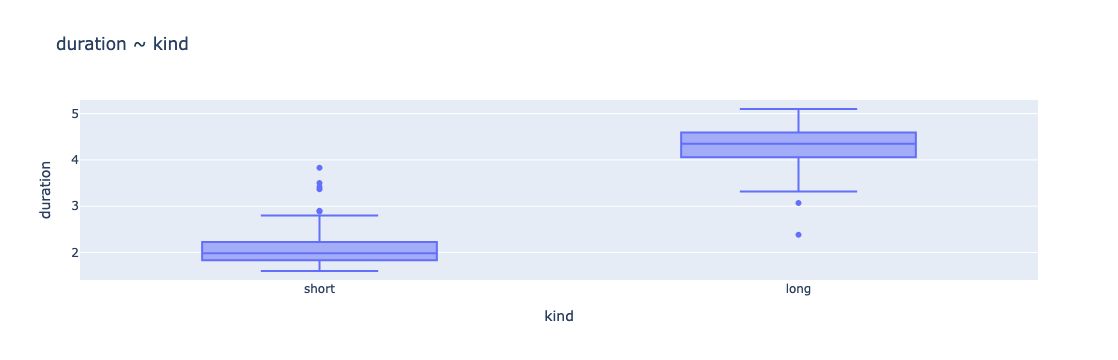

In [31]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [90]:
# import pandas as pd

# # Create a copy of the old_faithful DataFrame
# old_faithful_copy = old_faithful.copy()

# # Edit the "kind" column based on the condition
# old_faithful_copy['kind'] = old_faithful_copy['waiting'].apply(lambda x: 'short' if x < 68 else 'long')

# # Display the updated DataFrame to verify the changes
# # print(old_faithful_copy[['waiting', 'kind']].head())
# old_faithful_copy

In [87]:
# import statsmodels.formula.api as smf

# # Old thresholds (<64 == "short" and >71 == "long")
# old_short_wait = old_faithful['waiting'] < 64
# old_long_wait = old_faithful['waiting'] > 71

# # New thresholds (<68 == "short" and >=68 == "long")
# new_short_wait = old_faithful_copy['kind'] == 'short'
# new_long_wait = old_faithful_copy['kind'] == 'long'

# # 1. Model with full dataset using old thresholds
# model_old_full = smf.ols('duration ~ waiting', data=old_faithful).fit()

# # 2. Model with short wait times using old thresholds
# model_old_short = smf.ols('duration ~ waiting', data=old_faithful[old_short_wait]).fit()

# # 3. Model with long wait times using old thresholds
# model_old_long = smf.ols('duration ~ waiting', data=old_faithful[old_long_wait]).fit()

# # 4. Model with full dataset using new thresholds
# model_new_full = smf.ols('duration ~ waiting', data=old_faithful_copy).fit()

# # 5. Model with short wait times using new thresholds
# model_new_short = smf.ols('duration ~ waiting', data=old_faithful_copy[new_short_wait]).fit()

# # 6. Model with long wait times using new thresholds
# model_new_long = smf.ols('duration ~ waiting', data=old_faithful_copy[new_long_wait]).fit()

# # Display the summaries of the six models
# print("Model 1: Full Dataset (Old Thresholds)")
# print(model_old_full.summary())
# print("\nModel 4: Full Dataset (New Thresholds)")
# print(model_new_full.summary())
# print("\nModel 2: Short Wait Times (Old Thresholds)")
# print(model_old_short.summary())
# print("\nModel 5: Short Wait Times (New Thresholds)")
# print(model_new_short.summary())
# print("\nModel 3: Long Wait Times (Old Thresholds)")
# print(model_old_long.summary())
# print("\nModel 6: Long Wait Times (New Thresholds)")
# print(model_new_long.summary())


In [88]:
# import pandas as pd

# # Extract intercept and slope from each model
# comparison_data = {
#     "Model": [
#         "Full Dataset (Old Thresholds)",
#         "Full Dataset (New Thresholds)",
#         "Short Wait Times (Old Thresholds)",
#         "Short Wait Times (New Thresholds)",
#         "Long Wait Times (Old Thresholds)",
#         "Long Wait Times (New Thresholds)"
#     ],
#     "Intercept": [
#         model_old_full.params['Intercept'],
#         model_new_full.params['Intercept'],
#         model_old_short.params['Intercept'],
#         model_new_short.params['Intercept'],
#         model_old_long.params['Intercept'],
#         model_new_long.params['Intercept']
#     ],
#     "Slope": [
#         model_old_full.params['waiting'],
#         model_new_full.params['waiting'],
#         model_old_short.params['waiting'],
#         model_new_short.params['waiting'],
#         model_old_long.params['waiting'],
#         model_new_long.params['waiting']
#     ]
# }

# # Create a DataFrame to display the results as a table
# comparison_df = pd.DataFrame(comparison_data)

# # Print the comparison table
# print(comparison_df)

# # # Optionally, you can display this table using a visualization library like Plotly for interactive use:
# # import plotly.express as px
# # fig = px.table(comparison_df, title="Comparison of Intercept and Slope Between Old and New Thresholds")
# # fig.show()


In [89]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Create scatter plot of duration vs. waiting time
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=old_faithful_copy, x='waiting', y='duration', hue='kind', palette='coolwarm', s=80, alpha=0.7)

# # Add regression lines for both short and long categories
# # Short wait times (waiting < 68)
# short_wait_data = old_faithful_copy[old_faithful_copy['waiting'] < 68]
# sns.regplot(data=short_wait_data, x='waiting', y='duration', scatter=False, line_kws={'color': 'blue', 'lw': 2})

# # Long wait times (waiting >= 68)
# long_wait_data = old_faithful_copy[old_faithful_copy['waiting'] >= 68]
# sns.regplot(data=long_wait_data, x='waiting', y='duration', scatter=False, line_kws={'color': 'red', 'lw': 2})

# # Customize the plot
# plt.title('Scatter Plot with Regression Lines for Short and Long Wait Times')
# plt.xlabel('Waiting Time (minutes)')
# plt.ylabel('Duration (minutes)')
# plt.legend(title="Wait Time Category", loc='upper left')
# plt.grid(True)
# plt.show()


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


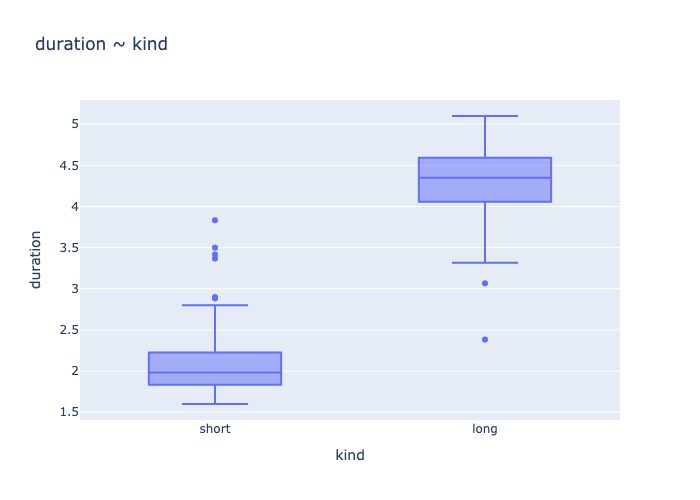

In [91]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


In [70]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming old_faithful is already loaded as a DataFrame

# Step 1: Create the indicator variable 'wait_kind'
old_faithful['wait_kind'] = (old_faithful['waiting'] >= 68).astype(int)

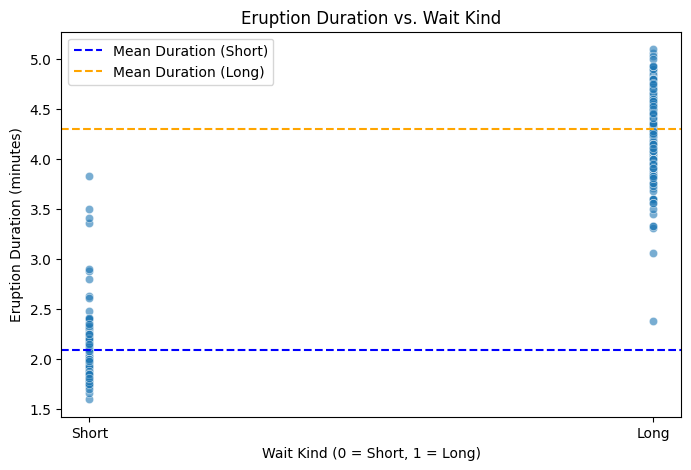

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(8, 5))

# Use seaborn to create a scatter plot
sns.scatterplot(x='wait_kind', y='duration', data=old_faithful, alpha=0.6)

# Calculate and overlay the mean duration for "short" and "long" groups
mean_short = old_faithful[old_faithful['wait_kind'] == 0]['duration'].mean()
mean_long = old_faithful[old_faithful['wait_kind'] == 1]['duration'].mean()

# Plot the mean values
plt.axhline(y=mean_short, color='blue', linestyle='--', label='Mean Duration (Short)')
plt.axhline(y=mean_long, color='orange', linestyle='--', label='Mean Duration (Long)')

# Customize the plot
plt.xticks([0, 1], ['Short', 'Long'])
plt.xlabel('Wait Kind (0 = Short, 1 = Long)')
plt.ylabel('Eruption Duration (minutes)')
plt.title('Eruption Duration vs. Wait Kind')
plt.legend()
plt.grid(visible=False)
plt.show()


In [81]:
import statsmodels.formula.api as smf
import pandas as pd

# Fit the models
model_full = smf.ols('duration ~ waiting', data=old_faithful).fit()
model_short = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
model_long = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()

# Function to extract relevant statistics, including confidence intervals, and round them
def extract_stats(model):
    ci = model.conf_int()  # Get the confidence intervals
    return {
        'Slope': round(model.params['waiting'], 3),
        'Slope 95% CI': (round(ci.loc['waiting', 0], 3), round(ci.loc['waiting', 1], 3)),
        'Slope p-value': round(model.pvalues['waiting'], 3)
    }

# Extract stats for each model and round values
stats_full = extract_stats(model_full)
stats_short = extract_stats(model_short)
stats_long = extract_stats(model_long)

# Create a DataFrame to display the statistics
stats_df = pd.DataFrame([stats_full, stats_short, stats_long], 
                        index=['Full Dataset', 'Short Wait Times', 'Long Wait Times'])

# Print the table
print(stats_df)


                  Slope    Slope 95% CI  Slope p-value
Full Dataset      0.076   (0.071, 0.08)            0.0
Short Wait Times  0.029  (0.017, 0.041)            0.0
Long Wait Times   0.024  (0.013, 0.035)            0.0


**Big Picture Differences:**

- In contrast to the original models, this model is binary and discrete because it uses an indicator variable for the wait time length (categorized as "short" or "long"). 
- This approach reduces the impact of extreme outliers since the variable is capped at 0 or 1, with all wait times below 68 categorized as 0 ("short") and those above 68 as 1 ("long").
- Theoretically, the binary specification might result in a smaller slope, as binary values (0 and 1) will affect the slope less dramatically than continuous wait times.

**Evidence Against the Null Hypothesis:**

- The p-value for all three models is 0.0, indicating strong evidence against the null hypothesis of no difference between the groups.
- None of the 95% confidence intervals for the slopes include zero, further supporting the conclusion that there is a significant difference in the durations between the "short" and "long" wait times.

#### 12: 

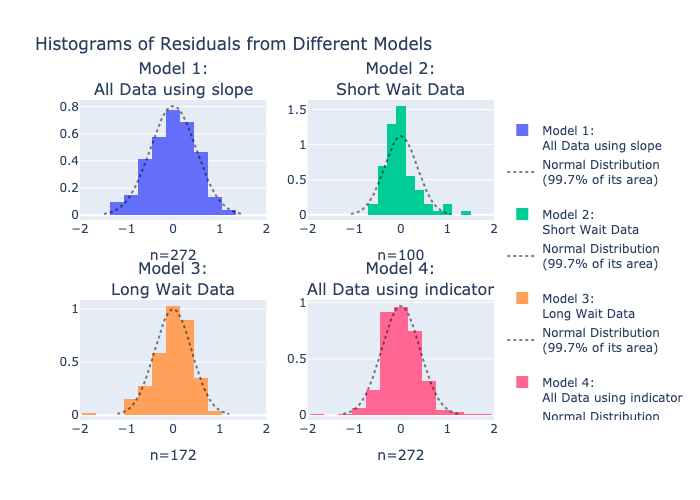

In [92]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Don't really understand this question... will ask in class. 

#### 13:

In [102]:
old_faithful

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [103]:
import pandas as pd

# Copy the original DataFrame
shuffled_old_faithful = old_faithful.copy()

# Shuffle the labels in the 'kind' column
shuffled_old_faithful['kind'] = shuffled_old_faithful['kind'].sample(frac=1).reset_index(drop=True)

# Show the resulting DataFrame
print(shuffled_old_faithful)


     duration  waiting   kind
0       3.600       79   long
1       1.800       54   long
2       3.333       74   long
3       2.283       62   long
4       4.533       85   long
..        ...      ...    ...
267     4.117       81   long
268     2.150       46  short
269     4.417       90   long
270     1.817       46   long
271     4.467       74   long

[272 rows x 3 columns]


In [106]:
model_bootstrap = smf.ols('duration ~ C(kind)', data=bootstrap_sample).fit()
model_bootstrap.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.165
Date:                Wed, 06 Nov 2024   Prob (F-statistic):             0.0764
Time:                        01:12:51   Log-Likelihood:                -403.25
No. Observations:                 272   AIC:                             810.5
Df Residuals:                     270   BIC:                             817.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.6790      0.078     47.411      0.000       3.526       3.832
C(kind)[T.short]    -0.2514      0.141     -1.779      0.076      -0.530       0.027
==============================================================================
Omnibus:                       86.907   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.606
Skew:                          -0.622   Prob(JB):                     2.26e-07
Kurtosis:                       1.925   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
import numpy as np
import statsmodels.formula.api as smf

# Number of bootstrap iterations
n_iterations = 1000

# List to store the bootstrapped slopes
bootstrapped_slopes = []

# Bootstrap loop
for i in range(n_iterations):
    # Resample the shuffled dataframe (with replacement)
    bootstrap_sample = shuffled_old_faithful.sample(n=len(shuffled_old_faithful), replace=True)
    
    # Fit the model on the bootstrap sample
    model_bootstrap = smf.ols('duration ~ C(kind)', data=bootstrap_sample).fit()
    
    # Store the slope for the 'kind' category coefficient
    bootstrapped_slopes.append(model_bootstrap.params['C(kind)[T.short]'])  # assuming 'long' is one of the categories

# Calculate the 95% confidence interval from the bootstrapped slopes
ci_lower = np.percentile(bootstrapped_slopes, 2.5)
ci_upper = np.percentile(bootstrapped_slopes, 97.5)

# Print the confidence interval
print(f"95% Confidence Interval for 'long' category slope: ({ci_lower:.3f}, {ci_upper:.3f})")


95% Confidence Interval for 'long' category slope: (-0.389, 0.150)


https://chatgpt.com/share/67318eca-4494-8010-8990-dc4de9d9580d

Here's a summary of our recent conversation:

1. **Data Analysis and Modeling**: You worked with the `old_faithful` dataset to explore relationships between wait times and eruption durations. We discussed setting up different linear regression models for subsets of the data (e.g., "short" and "long" wait times) and compared model statistics such as R-squared, p-values, and confidence intervals.

2. **Confidence Intervals**: After shuffling labels in the `kind` column, you wanted to compute 95% confidence intervals using bootstrap resampling with 1,000 iterations.


This conversation covered applying statistical tests, understanding model assumptions, and interpreting evidence against the null hypothesis.